In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iit-delhi-ear/data.npy
/kaggle/input/iit-delhi-ear/label.npy
/kaggle/input/iit-delhi-ear1/label.npy


In [28]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data = np.load('/kaggle/input/iit-delhi-ear/data.npy')
label = np.load('/kaggle/input/iit-delhi-ear1/label.npy')

In [30]:
len(label)

1286

In [31]:
data.shape

(1286, 180, 50, 3)

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
encode=LabelEncoder()
label_encode= encode.fit_transform(label)

In [34]:
encode.classes_

array(['001', '002', '003', '004', '005', '006', '007', '008', '009',
       '010', '011', '012', '013', '014', '015', '016', '017', '018',
       '019', '020', '021', '022', '023', '024', '025', '026', '027',
       '028', '029', '030', '031', '032', '033', '034', '035', '036',
       '037', '038', '039', '040', '041', '042', '043', '044', '045',
       '046', '047', '048', '049', '050', '051', '052', '053', '054',
       '055', '056', '057', '058', '059', '060', '061', '062', '063',
       '064', '065', '066', '067', '068', '069', '070', '071', '072',
       '073', '074', '075', '076', '077', '078', '079', '080', '081',
       '082', '083', '084', '085', '086', '087', '088', '089', '090',
       '091', '092', '093', '094', '095', '096', '097', '098', '099',
       '100', '101', '102', '103', '104', '105', '106', '107', '108',
       '109', '110', '111', '112', '113', '114', '115', '116', '117',
       '118', '119', '120', '121', '122', '123', '124', '125', '126',
       '127', '128',

In [35]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import layers 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.layers import LeakyReLU
from sklearn import metrics

In [36]:
classes_cat = to_categorical(label_encode)

In [37]:
classes_cat.shape

(1286, 221)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(data, classes_cat, test_size=0.10, random_state=42)

In [40]:
x_train.shape

(1157, 180, 50, 3)

In [41]:
class_ear = list(encode.classes_)
len(class_ear)

221

In [42]:
model = Sequential()
model.add(Conv2D(8 , (3,3), padding='same', activation = 'tanh' , input_shape = (180,50,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16 , (3,3), padding='same', activation = 'tanh'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32 , (3,3), padding='same', activation = 'tanh'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64 , (3,3), padding='same', activation = 'tanh'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128 , (3,3), padding='same', activation = 'tanh'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256 , (3,3), padding='same', activation = 'tanh'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(units = 221 , activation = 'softmax'))
model.compile(optimizer = "rmsprop" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 180, 50, 8)        224       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 90, 25, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 25, 16)        1168      
_________________________________________________________________
batch_normalization_3 (Batch (None, 90, 25, 16)        64        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 45, 12, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 12, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 22, 6, 32)        

In [43]:
%time hist = model.fit(x_train, y_train, batch_size = 128, epochs = 500, validation_split = 0.1)
model.evaluate(x_test, y_test)[1]

Epoch 1/500
9/9 [==============================] - 6s 528ms/step - loss: 5.9203 - accuracy: 0.0647 - val_loss: 5.3995 - val_accuracy: 0.0000e+00
Epoch 2/500
9/9 [==============================] - 4s 463ms/step - loss: 3.0890 - accuracy: 0.3884 - val_loss: 5.3561 - val_accuracy: 0.0000e+00
Epoch 3/500
9/9 [==============================] - 4s 463ms/step - loss: 1.5236 - accuracy: 0.6790 - val_loss: 5.3307 - val_accuracy: 0.0172
Epoch 4/500
9/9 [==============================] - 4s 459ms/step - loss: 0.9006 - accuracy: 0.8191 - val_loss: 5.3143 - val_accuracy: 0.0000e+00
Epoch 5/500
9/9 [==============================] - 4s 452ms/step - loss: 0.6218 - accuracy: 0.8855 - val_loss: 5.2972 - val_accuracy: 0.0086
Epoch 6/500
9/9 [==============================] - 4s 458ms/step - loss: 0.6693 - accuracy: 0.8734 - val_loss: 5.2561 - val_accuracy: 0.0345
Epoch 7/500
9/9 [==============================] - 4s 462ms/step - loss: 0.3069 - accuracy: 0.9597 - val_loss: 5.2381 - val_accuracy: 0.0259
E

0.8837209343910217

In [44]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

5/5 [==============================] - 0s 31ms/step - loss: 1.2615 - accuracy: 0.8837
Loss of the model is -  1.261537790298462
5/5 [==============================] - 0s 31ms/step - loss: 1.2615 - accuracy: 0.8837
Accuracy of the model is -  88.37209343910217 %


In [45]:
x_test.shape

(129, 180, 50, 3)

In [46]:
x_train.shape

(1157, 180, 50, 3)

In [47]:
y_pred = model.predict(x_test)
ry_pred = np.argmax(y_pred,axis=1)
rounded_labels = np.argmax(y_test, axis=1)

In [48]:
print("Accuracy:",metrics.accuracy_score(rounded_labels, ry_pred))
print("Precision:", metrics.precision_score(rounded_labels, ry_pred, pos_label='positive', average='weighted'))
print("Recall:", metrics.recall_score(rounded_labels, ry_pred, pos_label='positive', average='weighted'))
def specificity_score(y_true, y_pred):
    p, r, f, s = metrics.precision_recall_fscore_support(y_true, y_pred,pos_label='positive', average='weighted')
    return r
print("sensitivity:", metrics.recall_score(rounded_labels, ry_pred, pos_label='positive', average='weighted'))
#print("specificity:", specificity_score(rounded_labels1, ry_pred1))
print("f1 score:", metrics.f1_score(rounded_labels, ry_pred, pos_label='positive', average='weighted'))
print(metrics.classification_report(rounded_labels, ry_pred))

Accuracy: 0.8837209302325582
Precision: 0.8772609819121447
Recall: 0.8837209302325582
sensitivity: 0.8837209302325582
f1 score: 0.8741602067183463
              precision    recall  f1-score   support

           4       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         1
          20       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         1
          22       1.00      1.00      1.00         3
          23       1.00      1.00      1.0

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F

In [49]:
import seaborn as sns

<AxesSubplot:>

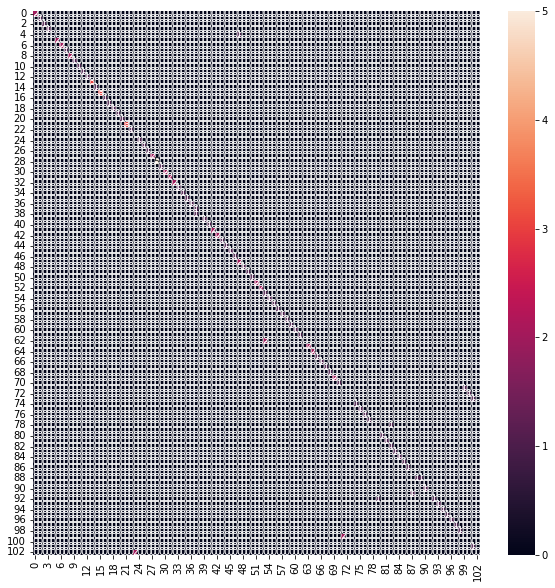

In [50]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(metrics.confusion_matrix(rounded_labels, ry_pred), annot=True, ax=ax)

In [51]:
# reshaping the predicted class 
yr_pred = y_pred.reshape(-1,1)
yr_pred.shape

(28509, 1)

In [52]:
# calculating the average testing and training accuracy
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
print('Average training accuracy: ', np.mean(train_acc))
print('Average training loss: ', np.mean(train_loss))
print('Average validation accuracy: ', np.mean(val_acc))
print('Average validation loss: ', np.mean(val_loss))

Average training accuracy:  0.9645629209429025
Average training loss:  0.07308429087698459
Average validation accuracy:  0.8364827537983656
Average validation loss:  0.9704422448575497


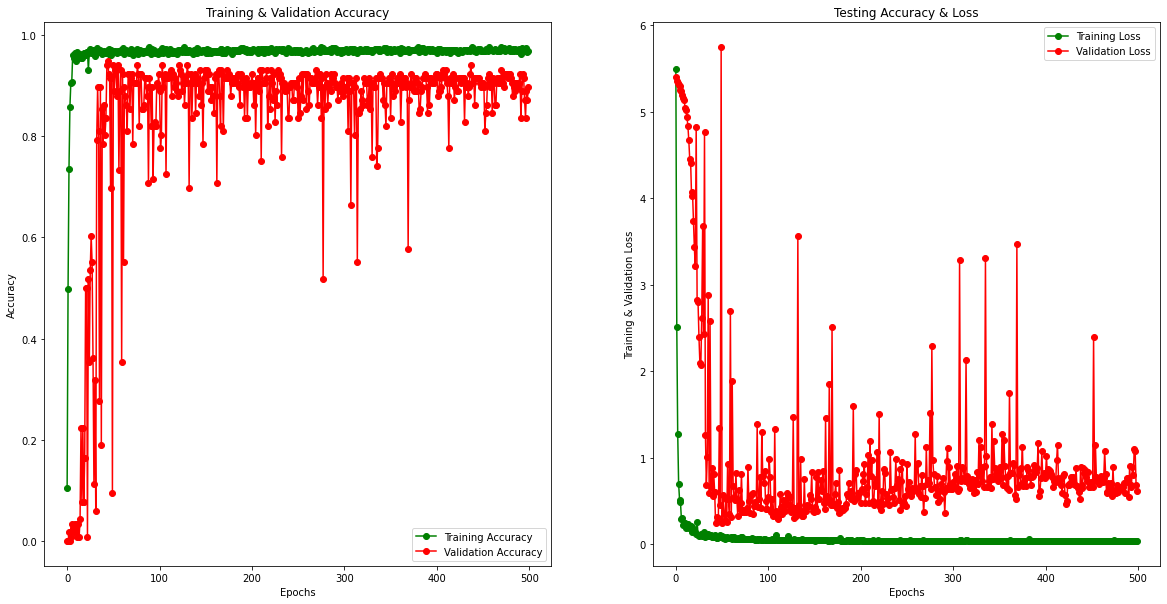

In [53]:
# plotting the accuracy and loss for validation and testing
epochs = [i for i in range(500)]
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()